In [85]:
import pandas as pd
import numpy as np

In [86]:
data = pd.read_csv(r"..\datasets\monthly\EURUSD_2024_08.csv")

In [87]:
data

,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-08-01 00:00:00,1.08238,1.08242,1.08229,1.08239,4,18,0
1,2024-08-01 00:01:00,1.08239,1.08244,1.08239,1.08244,6,16,0
2,2024-08-01 00:02:00,1.08244,1.08244,1.08228,1.08244,3,16,0
3,2024-08-01 00:03:00,1.08243,1.08244,1.08220,1.08220,5,4,0
4,2024-08-01 00:04:00,1.08244,1.08244,1.08220,1.08221,5,4,0
...,...,...,...,...,...,...,...,...
31663,2024-08-30 23:54:00,1.10480,1.10482,1.10480,1.10482,7,6,0
31664,2024-08-30 23:55:00,1.10476,1.10477,1.10469,1.10469,16,12,0
31665,2024-08-30 23:56:00,1.10470,1.10474,1.10465,1.10470,33,10,0
31666,2024-08-30 23:57:00,1.10470,1.10473,1.10465,1.10469,20,12,0


In [88]:
import pandas as pd

def heiken_ashi(data):
    """Calculate Heiken Ashi candles."""
    required_columns = ['open', 'high', 'low', 'close']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in the input dataframe")

    ha_data = pd.DataFrame(index=data.index)
    ha_data['HA_close'] = (data['open'] + data['high'] + data['low'] + data['close']) / 4
    ha_data['HA_open'] = (data['open'].shift(1) + data['close'].shift(1)) / 2
    ha_data['HA_high'] = data[['high', 'open', 'close']].max(axis=1)
    ha_data['HA_low'] = data[['low', 'open', 'close']].min(axis=1)

    ha_data['HA_open'].iloc[0] = data['open'].iloc[0]

    return ha_data




In [89]:
df_heiken_ashi = heiken_ashi(data)
df_heiken_ashi

C:\Users\hevar\AppData\Local\Temp\ipykernel_2956\1187745629.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ha_data['HA_open'].iloc[0] = data['open'].iloc[0]


,HA_close,HA_open,HA_high,HA_low
0,1.082370,1.082380,1.08242,1.08229
1,1.082415,1.082385,1.08244,1.08239
2,1.082400,1.082415,1.08244,1.08228
3,1.082318,1.082440,1.08244,1.08220
4,1.082323,1.082315,1.08244,1.08220
...,...,...,...,...
31663,1.104810,1.104825,1.10482,1.10480
31664,1.104727,1.104810,1.10477,1.10469
31665,1.104697,1.104725,1.10474,1.10465
31666,1.104693,1.104700,1.10473,1.10465


In [90]:
data['HA_close'] = df_heiken_ashi['HA_close']
data['HA_open'] = df_heiken_ashi['HA_open']
data['HA_high'] = df_heiken_ashi['HA_high']
data['HA_low'] = df_heiken_ashi['HA_low']

In [91]:
data

,time,open,high,low,close,tick_volume,spread,real_volume,HA_close,HA_open,HA_high,HA_low
0,2024-08-01 00:00:00,1.08238,1.08242,1.08229,1.08239,4,18,0,1.082370,1.082380,1.08242,1.08229
1,2024-08-01 00:01:00,1.08239,1.08244,1.08239,1.08244,6,16,0,1.082415,1.082385,1.08244,1.08239
2,2024-08-01 00:02:00,1.08244,1.08244,1.08228,1.08244,3,16,0,1.082400,1.082415,1.08244,1.08228
3,2024-08-01 00:03:00,1.08243,1.08244,1.08220,1.08220,5,4,0,1.082318,1.082440,1.08244,1.08220
4,2024-08-01 00:04:00,1.08244,1.08244,1.08220,1.08221,5,4,0,1.082323,1.082315,1.08244,1.08220
...,...,...,...,...,...,...,...,...,...,...,...,...
31663,2024-08-30 23:54:00,1.10480,1.10482,1.10480,1.10482,7,6,0,1.104810,1.104825,1.10482,1.10480
31664,2024-08-30 23:55:00,1.10476,1.10477,1.10469,1.10469,16,12,0,1.104727,1.104810,1.10477,1.10469
31665,2024-08-30 23:56:00,1.10470,1.10474,1.10465,1.10470,33,10,0,1.104697,1.104725,1.10474,1.10465
31666,2024-08-30 23:57:00,1.10470,1.10473,1.10465,1.10469,20,12,0,1.104693,1.104700,1.10473,1.10465


In [92]:
data.drop(['spread','tick_volume','real_volume'],axis=1,inplace=True)

In [93]:
data['HA_candle'] = data.apply(lambda row: 1 if row['HA_close'] > row['HA_open'] else 0, axis=1)

data

,time,open,high,low,close,HA_close,HA_open,HA_high,HA_low,HA_candle
0,2024-08-01 00:00:00,1.08238,1.08242,1.08229,1.08239,1.082370,1.082380,1.08242,1.08229,0
1,2024-08-01 00:01:00,1.08239,1.08244,1.08239,1.08244,1.082415,1.082385,1.08244,1.08239,1
2,2024-08-01 00:02:00,1.08244,1.08244,1.08228,1.08244,1.082400,1.082415,1.08244,1.08228,0
3,2024-08-01 00:03:00,1.08243,1.08244,1.08220,1.08220,1.082318,1.082440,1.08244,1.08220,0
4,2024-08-01 00:04:00,1.08244,1.08244,1.08220,1.08221,1.082323,1.082315,1.08244,1.08220,1
...,...,...,...,...,...,...,...,...,...,...
31663,2024-08-30 23:54:00,1.10480,1.10482,1.10480,1.10482,1.104810,1.104825,1.10482,1.10480,0
31664,2024-08-30 23:55:00,1.10476,1.10477,1.10469,1.10469,1.104727,1.104810,1.10477,1.10469,0
31665,2024-08-30 23:56:00,1.10470,1.10474,1.10465,1.10470,1.104697,1.104725,1.10474,1.10465,0
31666,2024-08-30 23:57:00,1.10470,1.10473,1.10465,1.10469,1.104693,1.104700,1.10473,1.10465,0


In [94]:
df = data

In [95]:
import pandas as pd

# Assuming your DataFrame is named df
df['Trade_Result'] = None  # Initialize column for trade results
df['Trade_PnL'] = None     # Initialize column for profit/loss values

# Loop through the DataFrame to track trades
for i in range(len(df) - 1):  # Iterate until the second-last row to avoid index out-of-range errors
    entry_price = df.loc[i, 'open']  # Trade entry at the open price
    current_candle = df.loc[i, 'HA_candle']
    
    # Look ahead to find the first row where the candle color changes
    for j in range(i + 1, len(df)):
        if df.loc[j, 'HA_candle'] != current_candle:  # Candle color changes
            exit_price = df.loc[j, 'close']  # Exit the trade at the close price
            
            # Calculate profit or loss based on the trade type
            if current_candle == 0:  # Sell trade
                profit = entry_price - exit_price
            else:  # Buy trade
                profit = exit_price - entry_price
            
            # Record the result (1 for profit, 0 for loss)
            df.loc[i, 'Trade_Result'] = 1 if profit > 0 else 0
            df.loc[i, 'Trade_PnL'] = profit  # Record the profit or loss value
            break  # Exit the inner loop once the trade is closed

# Display the DataFrame with the new 'Trade_Result' and 'Trade_PnL' columns
print(df[['time', 'HA_candle', 'Trade_Result', 'Trade_PnL']])


                      time  HA_candle Trade_Result Trade_PnL
0      2024-08-01 00:00:00          0            0  -0.00006
1      2024-08-01 00:01:00          1            1   0.00005
2      2024-08-01 00:02:00          0            1   0.00023
3      2024-08-01 00:03:00          0            1   0.00022
4      2024-08-01 00:04:00          1            0  -0.00011
...                    ...        ...          ...       ...
31663  2024-08-30 23:54:00          0         None      None
31664  2024-08-30 23:55:00          0         None      None
31665  2024-08-30 23:56:00          0         None      None
31666  2024-08-30 23:57:00          0         None      None
31667  2024-08-30 23:58:00          0         None      None

[31668 rows x 4 columns]


In [96]:
df.head(30)

,time,open,high,low,close,HA_close,HA_open,HA_high,HA_low,HA_candle,Trade_Result,Trade_PnL
0,2024-08-01 00:00:00,1.08238,1.08242,1.08229,1.08239,1.082370,1.082380,1.08242,1.08229,0,0,-0.00006
1,2024-08-01 00:01:00,1.08239,1.08244,1.08239,1.08244,1.082415,1.082385,1.08244,1.08239,1,1,0.00005
2,2024-08-01 00:02:00,1.08244,1.08244,1.08228,1.08244,1.082400,1.082415,1.08244,1.08228,0,1,0.00023
3,2024-08-01 00:03:00,1.08243,1.08244,1.08220,1.08220,1.082318,1.082440,1.08244,1.08220,0,1,0.00022
4,2024-08-01 00:04:00,1.08244,1.08244,1.08220,1.08221,1.082323,1.082315,1.08244,1.08220,1,0,-0.00011
5,2024-08-01 00:05:00,1.08240,1.08243,1.08221,1.08228,1.082330,1.082325,1.08243,1.08221,1,0,-0.00007
6,2024-08-01 00:06:00,1.08229,1.08240,1.08227,1.08240,1.082340,1.082340,1.08240,1.08227,1,1,0.00004
7,2024-08-01 00:07:00,1.08240,1.08240,1.08233,1.08233,1.082365,1.082345,1.08240,1.08233,1,0,-0.00007
8,2024-08-01 00:08:00,1.08233,1.08233,1.08233,1.08233,1.082330,1.082365,1.08233,1.08233,0,0,-0.00012
9,2024-08-01 00:09:00,1.08236,1.08245,1.08236,1.08245,1.082405,1.082330,1.08245,1.08236,1,0,-0.00003


In [97]:
df.isna().sum()

time            0
open            0
high            0
low             0
close           0
HA_close        0
HA_open         0
HA_high         0
HA_low          0
HA_candle       0
Trade_Result    7
Trade_PnL       7
dtype: int64

In [98]:
df.dropna(inplace=True)

In [99]:
import tensorflow as tf

In [100]:
# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Check devices visible to TensorFlow
print("Devices:", tf.config.list_physical_devices())

Num GPUs Available:  1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [101]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume df is your DataFrame and it's already loaded
# Define features and target
features = df[['open', 'high', 'low', 'close','HA_candle']]
target = df['Trade_Result']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reshape the data for LSTM/CNN input (samples, timesteps, features)
# Assume time steps to be, for example, 10
time_steps = 10
X, y = [], []

for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i-time_steps:i, :])
    y.append(target[i])

X, y = np.array(X), np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [102]:
df

,time,open,high,low,close,HA_close,HA_open,HA_high,HA_low,HA_candle,Trade_Result,Trade_PnL
0,2024-08-01 00:00:00,1.08238,1.08242,1.08229,1.08239,1.082370,1.082380,1.08242,1.08229,0,0,-0.00006
1,2024-08-01 00:01:00,1.08239,1.08244,1.08239,1.08244,1.082415,1.082385,1.08244,1.08239,1,1,0.00005
2,2024-08-01 00:02:00,1.08244,1.08244,1.08228,1.08244,1.082400,1.082415,1.08244,1.08228,0,1,0.00023
3,2024-08-01 00:03:00,1.08243,1.08244,1.08220,1.08220,1.082318,1.082440,1.08244,1.08220,0,1,0.00022
4,2024-08-01 00:04:00,1.08244,1.08244,1.08220,1.08221,1.082323,1.082315,1.08244,1.08220,1,0,-0.00011
...,...,...,...,...,...,...,...,...,...,...,...,...
31656,2024-08-30 23:47:00,1.10503,1.10503,1.10498,1.10498,1.105005,1.105030,1.10503,1.10498,0,1,0.00008
31657,2024-08-30 23:48:00,1.10498,1.10498,1.10497,1.10497,1.104975,1.105005,1.10498,1.10497,0,1,0.00003
31658,2024-08-30 23:49:00,1.10493,1.10496,1.10489,1.10490,1.104920,1.104975,1.10496,1.10489,0,0,-0.00002
31659,2024-08-30 23:50:00,1.10490,1.10499,1.10489,1.10495,1.104932,1.104915,1.10499,1.10489,1,0,-0.00004


In [103]:
df['Trade_Result'].value_counts()

Trade_Result
0    16079
1    15582
Name: count, dtype: int64

Epoch 1/10
396/396 [==============================] - 32s 50ms/step - loss: 0.6940 - accuracy: 0.5036 - val_loss: 0.6940 - val_accuracy: 0.5002
Epoch 2/10
396/396 [==============================] - 14s 35ms/step - loss: 0.6934 - accuracy: 0.5029 - val_loss: 0.6933 - val_accuracy: 0.5015
Epoch 3/10
396/396 [==============================] - 13s 32ms/step - loss: 0.6937 - accuracy: 0.5077 - val_loss: 0.6931 - val_accuracy: 0.5047
Epoch 4/10
396/396 [==============================] - 13s 33ms/step - loss: 0.6933 - accuracy: 0.5072 - val_loss: 0.6933 - val_accuracy: 0.5015
Epoch 5/10
396/396 [==============================] - 12s 31ms/step - loss: 0.6931 - accuracy: 0.5089 - val_loss: 0.6941 - val_accuracy: 0.5015
Epoch 6/10
396/396 [==============================] - 13s 32ms/step - loss: 0.6931 - accuracy: 0.5084 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 7/10
396/396 [==============================] - 12s 31ms/step - loss: 0.6931 - accuracy: 0.5075 - val_loss: 0.6931 - val_accuracy:

c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

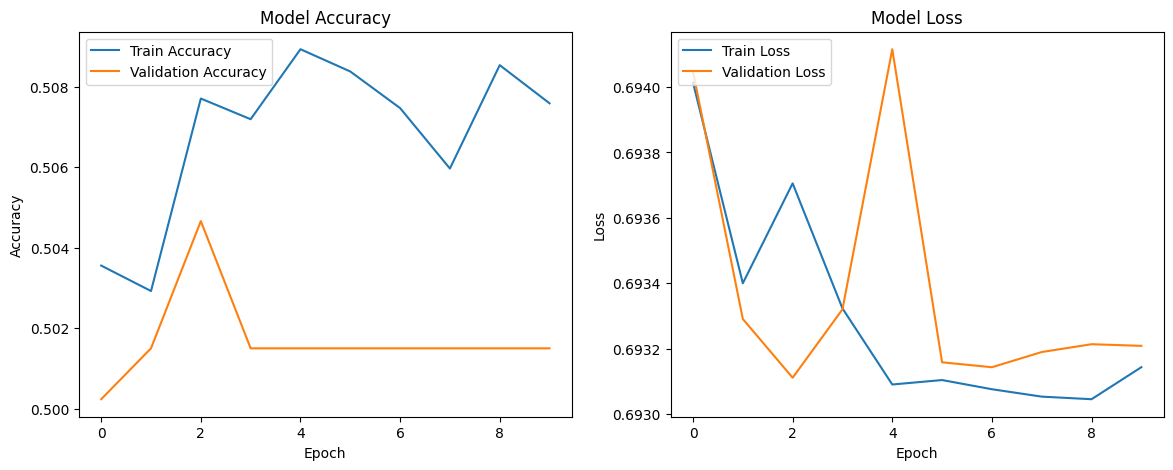

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Define the even deeper LSTM model
model = Sequential()

# First Bidirectional LSTM Layer with 300 units
model.add(Bidirectional(LSTM(units=300, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Adding dropout to prevent overfitting

# Second LSTM Layer with 250 units
model.add(LSTM(units=250, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM Layer with 200 units
model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.3))

# Fourth LSTM Layer with 150 units
model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.3))

# Fifth LSTM Layer with 100 units
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))

# Sixth LSTM Layer with 50 units
model.add(LSTM(units=50, return_sequences=False))  # The last LSTM layer, return_sequences=False
model.add(Dropout(0.3))

# Dense Layer with 50 units and ReLU activation
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.3))

# Output layer for binary classification with sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))

# Step 2: Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Step 4: Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Step 5: Evaluate the model and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Step 6: Plot the training and validation accuracy and loss over epochs
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3175
           1       0.00      0.00      0.00      3156

    accuracy                           0.50      6331
   macro avg       0.25      0.50      0.33      6331
weighted avg       0.25      0.50      0.34      6331



c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Error reading images_with_metadata/image_0.png: [Errno 2] No such file or directory: 'F:\\BullsEye - v5\\ipynb s\\images_with_metadata\\image_0.png'
